In [1]:
from IPython.display import display
from PIL import Image
import numpy as np

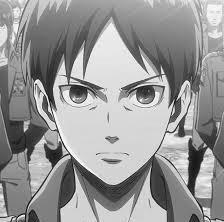

[[183 188 194 ... 227 218 223]
 [171 173 176 ... 218 214 223]
 [167 165 162 ... 220 219 230]
 ...
 [189 188 192 ...  92 113 132]
 [205 201 195 ...  94  45  38]
 [212 205 203 ... 214 184 178]]


In [2]:
img_gray = Image.open("../Images/img3/eren_gray.jpg") # open colour image
L, C = img_gray.size
display(img_gray)
img_gray = np.array(img_gray)
print(img_gray)
im = img_gray

In [3]:
chaine = "maman et mammy mangent ma mangue avec engouement"

### (1). Écrire une fonction qui extrait les différents symboles ainsi que leurs fréquences respectives

In [4]:
def ext_chr(chaine):
    occ = {c: chaine.count(c) for c in set(chaine)}
    return sorted(occ.items(), key=lambda x: x[1], reverse=True)

In [5]:
def frequency(chaine):
  freq = {c: (chaine.count(c))/len(chaine) for c in set(chaine)}
  return sorted(freq.items(), key = lambda x: x[1])

In [6]:
ext_chr(chaine)

[('m', 9),
 (' ', 7),
 ('e', 7),
 ('a', 7),
 ('n', 6),
 ('g', 3),
 ('t', 3),
 ('u', 2),
 ('v', 1),
 ('c', 1),
 ('o', 1),
 ('y', 1)]

### (2). Écrire une fonction qui crée le dictionnaire de codes $Huffman$ et qui en déduit les codes de compression

In [7]:
# Fonction principale implémentant le codage de Huffman
def huffman_dictionnary_code(node, binString=''):
    if isinstance(node, str):
        return {node: binString}
    (l, r) = node
    d = {}
    d.update(huffman_dictionnary_code(l, binString + '0'))
    d.update(huffman_dictionnary_code(r, binString + '1'))
    return d

In [8]:
# Construction de l'arbre de Huffman
def huffman_tree(chaine):
    nodes = ext_chr(chaine)
    
    while len(nodes) > 1:
        (key1, c1) = nodes.pop()
        (key2, c2) = nodes.pop()
        node = (key1, key2)
        nodes.append((node, c1 + c2))
        nodes.sort(key=lambda x: x[1], reverse=True)
        
    return nodes[0][0]

In [9]:
def encoding_huffman(string):
    nodes = huffman_tree(string)
    huffmanCode = huffman_dictionnary_code(nodes)
    compressed_string = ''
    
    for char in string:
        compressed_string += huffmanCode[char]
        
    return compressed_string, nodes

### (3). Écrire une fonction qui évalue toutes les caractéristiques du code

In [10]:
def entropy(chaine):
  liste = []
  
  for i, j in frequency(chaine):
    liste.append(j)
  
  return -np.sum(liste * np.log2(liste))

In [11]:
def mean_length(chaine):
  arbre = arbre_huffman(chaine)
  frequence = frequency(chaine)
  dictionnaire = dictionnaire_huffman(arbre).items()
  dictionnaire = list(dictionnaire)
  aux = []
  sum = 0
  
  for i, j in dictionnaire:
    for k, l in frequence:
      if i == k:
        aux.append(((i, j), (k, l)))
        sum += l * len(j)
        
  #print(aux)
    
  return sum

In [12]:
def efficacity(chaine):
  return entropy(chaine) / mean_length(chaine)

In [13]:
def rendement(chaine, alphabet_code):
  return entropy(chaine) / (mean_length(chaine) * np.log2(alphabet_code))

In [14]:
def redondance(chaine, alphabet_code):
  return 1 - rendement(chaine, alphabet_code)

In [15]:
def features(chaine, alphabet_code):
  caracteristiques = {}
  
  caracteristiques['Entropie'] = entropy(chaine)
  caracteristiques['Longueur_moyenne'] = mean_length(chaine)
  caracteristiques['Efficacité'] = efficacity(chaine)
  caracteristiques['Rendement'] = rendement(chaine, alphabet_code)
  caracteristiques['Redondance'] = redondance(chaine, alphabet_code)
  
  return caracteristiques

In [16]:
features(chaine, 2)

{'Entropie': 3.1994764927035653,
 'Longueur_moyenne': 3.2291666666666665,
 'Efficacité': 0.9908056235469106,
 'Rendement': 0.9908056235469106,
 'Redondance': 0.009194376453089403}

### (4). Écrire une fonction qui réalise le décodage d’une liste de booléen selon l’arbre passé en paramètre et qui permet de remonter à la séquence initiale.

In [17]:
def decoding_huffman(compressed_string, huffman_tree):
    decoded_string = ''
    current_node = huffman_tree
    
    for bit in compressed_string:
        if bit == '0':
            current_node = current_node[0]
        else:
            current_node = current_node[1]
        
        if isinstance(current_node, str):
            decoded_string += current_node
            current_node = huffman_tree
    
    return decoded_string

In [18]:
def taux_compression(data, compressed_data):
    taux = 1 - (len(compressed_data) / (len(data) * 8))
    return taux * 100